<ipython-input-5-b7115939a32c>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Incident detected at 2024-01-04 02:00:00 - Severity: Critical
Action Taken: Immediate shutdown or investigation.

Incident detected at 2024-01-04 07:00:00 - Severity: High
Action Taken: Send alert to SOC team for analysis.

Incident detected at 2024-01-05 10:00:00 - Severity: High
Action Taken: Send alert to SOC team for analysis.

Incident detected at 2024-01-05 17:00:00 - Severity: Critical
Action Taken: Immediate shutdown or investigation.

Incident detected at 2024-01-06 05:00:00 - Severity: High
Action Taken: Send alert to SOC team for analysis.

Incident detected at 2024-01-08 11:00:00 - Severity: Critical
Action Taken: Immediate shutdown or investigation.

Incident detected at 2024-01-09 17:00:00 - Severity: Critical
Action Taken: Immediate shutdown or investigation.

Incident detected at 2024-01-10 04:00:00 - Severity: High
Action Taken: Send alert to SOC team for analysis.

Incident detected at 2024-01-10 05:00:00 - Severity: High
Action

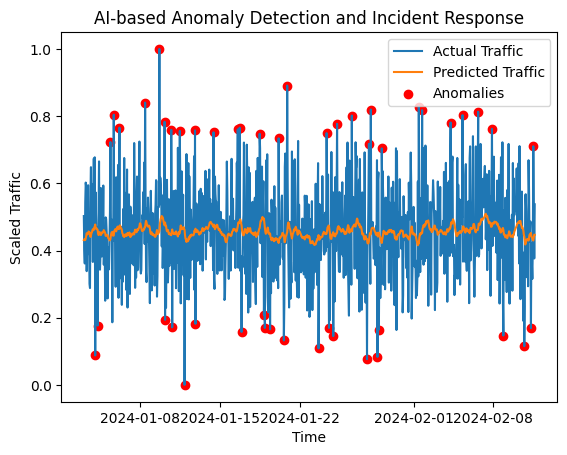

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# ========================================
# Simulate example data for demonstration
data_length = 1000
np.random.seed(42)
timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
traffic = np.random.normal(loc=50, scale=10, size=data_length)

# Create dataframe
df = pd.DataFrame({'timestamp': timestamps, 'traffic': traffic})

# Step 2: Feature Scaling
# ========================================
scaler = MinMaxScaler()
df['traffic_scaled'] = scaler.fit_transform(df[['traffic']])

# Step 3: Prepare data for LSTM (Supervised Learning)
# ========================================
sequence_length = 50  # Adjust based on desired look-back period

def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(df['traffic_scaled'].values, sequence_length)

# Reshape X to be compatible with LSTM input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Building the LSTM Model (AI component)
# ========================================
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=10, batch_size=32, verbose=0)

# Step 5: Detecting Incidents (Anomalies) using AI
# ========================================
# Predict network traffic
predicted_traffic = model.predict(X)

# Calculate anomaly score (difference between predicted and actual traffic)
anomaly_scores = np.abs(predicted_traffic.flatten() - y)

# Set a threshold to flag anomalies
threshold = np.mean(anomaly_scores) + 2 * np.std(anomaly_scores)

# Initialize the 'anomaly' column with NaN
df['anomaly'] = np.nan

# Assign anomaly flag for rows after 'sequence_length'
df.loc[sequence_length:, 'anomaly'] = (anomaly_scores > threshold).astype(int)

# Step 6: Incident Response Workflow
# ========================================
def incident_response(timestamp, severity, action):
    print(f"Incident detected at {timestamp} - Severity: {severity}")
    if severity == 'Critical':
        action = 'Immediate shutdown or investigation.'
    elif severity == 'High':
        action = 'Send alert to SOC team for analysis.'
    else:
        action = 'Log the incident for further review.'
    print(f"Action Taken: {action}\n")

# Incident response mechanism
for index, row in df[sequence_length:].iterrows():
    if row['anomaly'] == 1:
        # Prioritize the incident based on anomaly score severity (mock severity levels)
        score = anomaly_scores[index - sequence_length]
        if score > threshold + 0.05:
            severity = 'Critical'
        elif score > threshold:
            severity = 'High'
        else:
            severity = 'Low'

        # Trigger incident response
        incident_response(row['timestamp'], severity, 'Pending action')

# Step 7: Visualizing Anomalies Detected by AI
# ========================================
# The flagged anomalies represent potential security incidents detected by the AI model.
plt.plot(df['timestamp'][sequence_length:], df['traffic_scaled'][sequence_length:], label='Actual Traffic')
plt.plot(df['timestamp'][sequence_length:], predicted_traffic, label='Predicted Traffic')
plt.scatter(df['timestamp'][sequence_length:][df['anomaly'] == 1],
            df['traffic_scaled'][sequence_length:][df['anomaly'] == 1],
            color='red', label='Anomalies')

plt.title('AI-based Anomaly Detection and Incident Response')
plt.xlabel('Time')
plt.ylabel('Scaled Traffic')
plt.legend()
plt.show()


Epoch 1/20


<ipython-input-6-9486258337d2>:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.2208
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0291
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0200
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0199
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0186
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0187
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0195
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0202
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0185
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0194
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0193
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0196
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0207
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0183
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0195
Epoch 16/20
30/

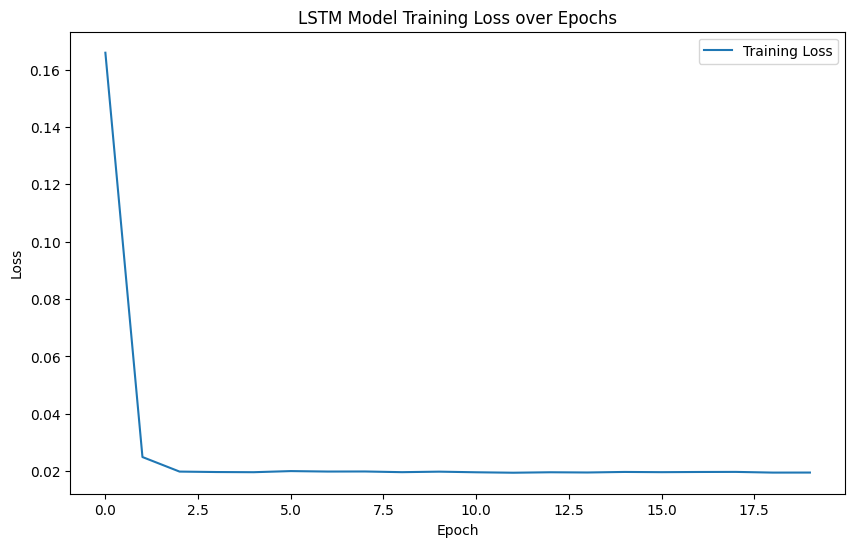

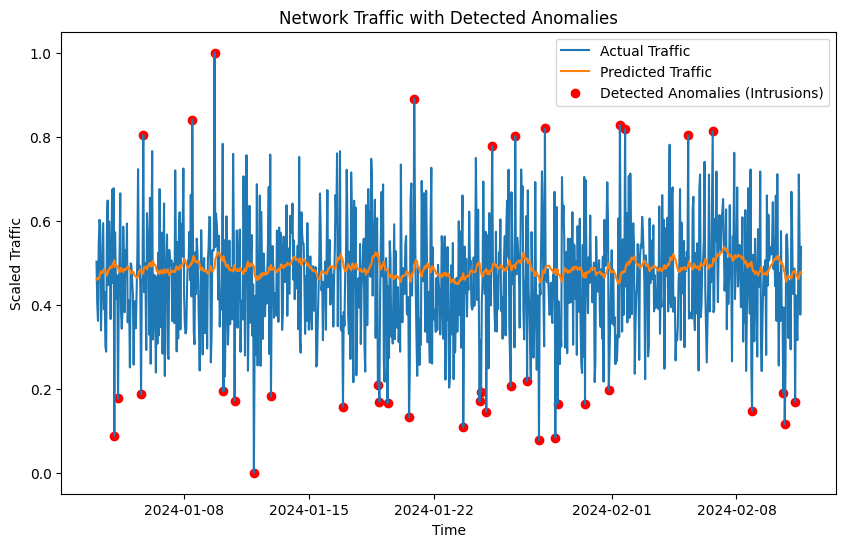

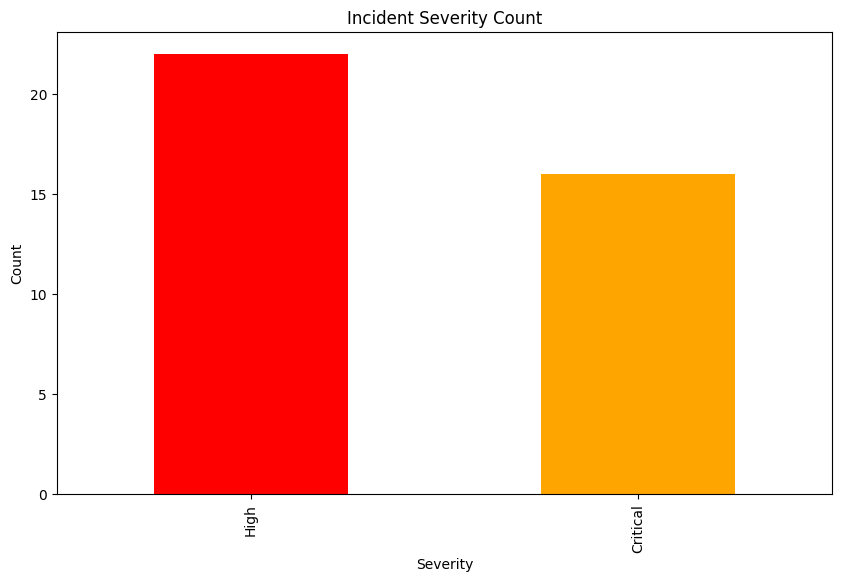

Total Anomalies Detected: 38.0
Critical Incidents: 16
High Severity Incidents: 22
Low Severity Incidents: 0


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# ========================================
# Simulate example data for demonstration
data_length = 1000
np.random.seed(42)
timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
traffic = np.random.normal(loc=50, scale=10, size=data_length)

# Create dataframe
df = pd.DataFrame({'timestamp': timestamps, 'traffic': traffic})

# Step 2: Feature Scaling
# ========================================
scaler = MinMaxScaler()
df['traffic_scaled'] = scaler.fit_transform(df[['traffic']])

# Step 3: Prepare data for LSTM (Supervised Learning)
# ========================================
sequence_length = 50  # Adjust based on desired look-back period

def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(df['traffic_scaled'].values, sequence_length)

# Reshape X to be compatible with LSTM input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Building the LSTM Model (AI component)
# ========================================
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model and capture training history
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Step 5: Detecting Incidents (Anomalies) using AI
# ========================================
# Predict network traffic
predicted_traffic = model.predict(X)

# Calculate anomaly score (difference between predicted and actual traffic)
anomaly_scores = np.abs(predicted_traffic.flatten() - y)

# Set a threshold to flag anomalies
threshold = np.mean(anomaly_scores) + 2 * np.std(anomaly_scores)

# Initialize the 'anomaly' column with NaN
df['anomaly'] = np.nan

# Assign anomaly flag for rows after 'sequence_length'
df.loc[sequence_length:, 'anomaly'] = (anomaly_scores > threshold).astype(int)

# Step 6: Incident Response Workflow with Severity
# ========================================
def incident_response(timestamp, severity, action):
    print(f"Incident detected at {timestamp} - Severity: {severity}")
    if severity == 'Critical':
        action = 'Immediate shutdown or investigation.'
    elif severity == 'High':
        action = 'Send alert to SOC team for analysis.'
    else:
        action = 'Log the incident for further review.'
    print(f"Action Taken: {action}\n")

# Severity and action mechanism
severities = []
for index, row in df[sequence_length:].iterrows():
    if row['anomaly'] == 1:
        # Prioritize the incident based on anomaly score severity
        score = anomaly_scores[index - sequence_length]
        if score > threshold + 0.05:
            severity = 'Critical'
        elif score > threshold:
            severity = 'High'
        else:
            severity = 'Low'
        severities.append(severity)

        # Trigger incident response
        incident_response(row['timestamp'], severity, 'Pending action')
    else:
        severities.append('Normal')

df.loc[sequence_length:, 'severity'] = severities

# Step 7: Visualization
# ========================================
# 1. Plotting training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('LSTM Model Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Plotting anomalies (intrusions) detected
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'][sequence_length:], df['traffic_scaled'][sequence_length:], label='Actual Traffic')
plt.plot(df['timestamp'][sequence_length:], predicted_traffic, label='Predicted Traffic')
plt.scatter(df['timestamp'][sequence_length:][df['anomaly'] == 1],
            df['traffic_scaled'][sequence_length:][df['anomaly'] == 1],
            color='red', label='Detected Anomalies (Intrusions)')
plt.title('Network Traffic with Detected Anomalies')
plt.xlabel('Time')
plt.ylabel('Scaled Traffic')
plt.legend()
plt.show()

# 3. Severity Graph
plt.figure(figsize=(10, 6))
severity_count = df.loc[df['anomaly'] == 1, 'severity'].value_counts()
severity_count.plot(kind='bar', color=['red', 'orange', 'yellow'], title='Incident Severity Count')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.show()

# Step 8: Statistics Summary
# ========================================
total_anomalies = df['anomaly'].sum()
critical_incidents = (df['severity'] == 'Critical').sum()
high_incidents = (df['severity'] == 'High').sum()
low_incidents = (df['severity'] == 'Low').sum()

print(f"Total Anomalies Detected: {total_anomalies}")
print(f"Critical Incidents: {critical_incidents}")
print(f"High Severity Incidents: {high_incidents}")
print(f"Low Severity Incidents: {low_incidents}")


Epoch 1/20


<ipython-input-19-e5391ba5eb32>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-19-e5391ba5eb32>:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.1135
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0208
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0205
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0220
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0197
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0191
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0210
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0200
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0208
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0198
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0191
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0207
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0192
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0205
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0194
Epoch 16/20
30/

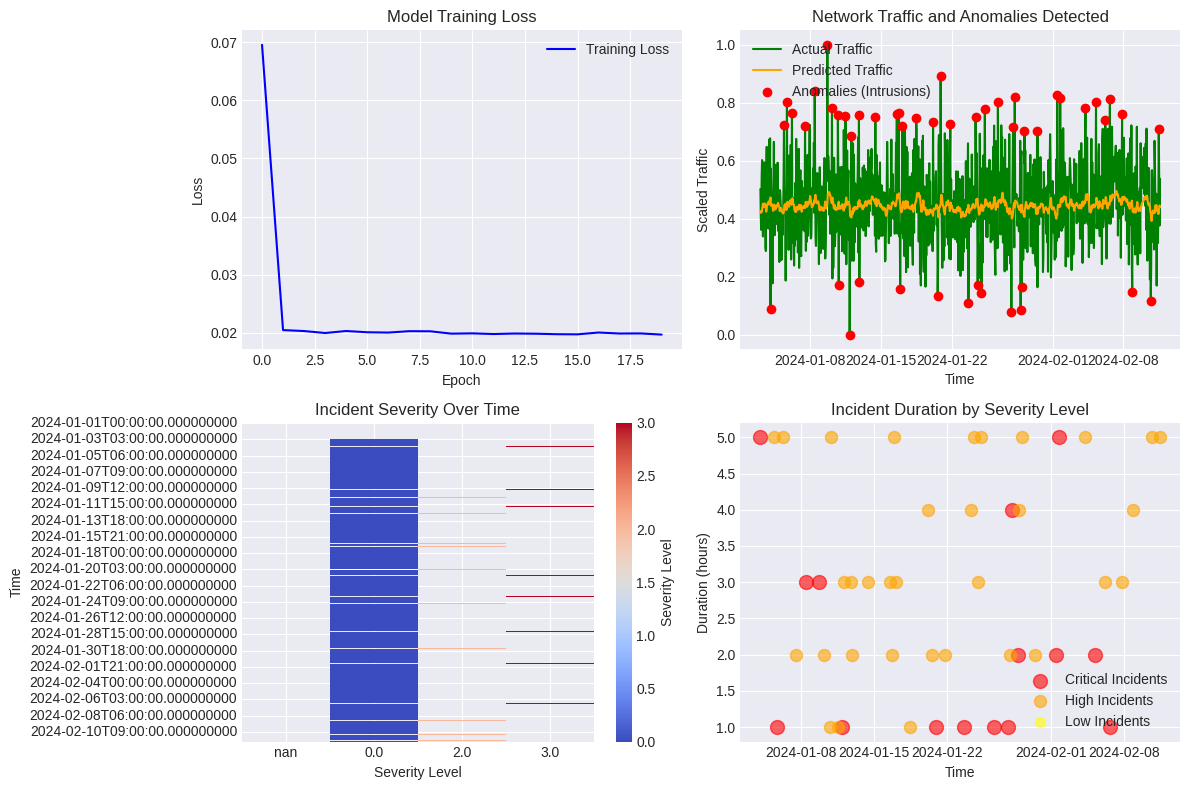

Total Anomalies Detected: 48.0
Average Detection Time (minutes): 1369.83
Average Duration of Incidents (hours): 0.15
Baseline Response Time (minutes): 2000
Time Saved by Using AI (minutes): 630.17


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set the style for better visualization
plt.style.use('seaborn-darkgrid')

# Step 1: Data Preparation (same as before)
# ========================================
data_length = 1000
np.random.seed(42)
timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
traffic = np.random.normal(loc=50, scale=10, size=data_length)

# Create dataframe
df = pd.DataFrame({'timestamp': timestamps, 'traffic': traffic})

# Step 2: Feature Scaling
# ========================================
scaler = MinMaxScaler()
df['traffic_scaled'] = scaler.fit_transform(df[['traffic']])

# Step 3: Prepare data for LSTM
# ========================================
sequence_length = 50

def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(df['traffic_scaled'].values, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Building the LSTM Model
# ========================================
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Step 5: Detecting Incidents (Anomalies)
# ========================================
predicted_traffic = model.predict(X)
anomaly_scores = np.abs(predicted_traffic.flatten() - y)
threshold = np.mean(anomaly_scores) + 2 * np.std(anomaly_scores)

df['anomaly'] = np.nan
df.loc[sequence_length:, 'anomaly'] = (anomaly_scores > threshold).astype(int)

# Step 6: Advanced Incident Response Workflow (Updated)
# ========================================
def incident_response_flow(timestamp, severity, action_taken, duration, detection_time):
    return {
        'timestamp': timestamp,
        'severity': severity,
        'action_taken': action_taken,
        'duration': duration,
        'detection_time': detection_time
    }

response_log = []
severities = []
durations = []
actions_taken = []
detection_times = []

for index, row in df[sequence_length:].iterrows():
    if row['anomaly'] == 1:
        score = anomaly_scores[index - sequence_length]
        detection_time = row['timestamp'] - df['timestamp'][sequence_length - 1]

        if score > threshold + 0.05:
            severity = 'Critical'
            action_taken = 'Immediate shutdown or investigation.'
        elif score > threshold:
            severity = 'High'
            action_taken = 'Send alert to SOC team for analysis.'
        else:
            severity = 'Low'
            action_taken = 'Log the incident for further review.'

        duration = random.randint(1, 5)  # Simulate the duration in hours for incident resolution
        response_log.append(incident_response_flow(row['timestamp'], severity, action_taken, duration, detection_time.total_seconds() / 60))  # Convert to minutes

        severities.append(severity)
        durations.append(duration)
        actions_taken.append(action_taken)
        detection_times.append(detection_time.total_seconds() / 60)  # Store detection time in minutes
    else:
        severities.append('Normal')
        durations.append(0)
        actions_taken.append('No action')
        detection_times.append(0)

df.loc[sequence_length:, 'severity'] = severities
df.loc[sequence_length:, 'duration'] = durations
df.loc[sequence_length:, 'action_taken'] = actions_taken
df.loc[sequence_length:, 'detection_time'] = detection_times

# Step 7: Advanced Visualization (Cleaned Up)
# ========================================
plt.figure(figsize=(12, 8))

# 1. Visualizing Training Loss over Epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Anomalies Over Time
plt.subplot(2, 2, 2)
plt.plot(df['timestamp'][sequence_length:], df['traffic_scaled'][sequence_length:], label='Actual Traffic', color='green')
plt.plot(df['timestamp'][sequence_length:], predicted_traffic, label='Predicted Traffic', color='orange')
plt.scatter(df['timestamp'][sequence_length:][df['anomaly'] == 1],
            df['traffic_scaled'][sequence_length:][df['anomaly'] == 1],
            color='red', label='Anomalies (Intrusions)', zorder=5)

plt.title('Network Traffic and Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Scaled Traffic')
plt.legend()

# 3. Heatmap of Severity Over Time
plt.subplot(2, 2, 3)
severity_map = {'Critical': 3, 'High': 2, 'Low': 1, 'Normal': 0}
df['severity_level'] = df['severity'].map(severity_map)
severity_pivot = df.pivot(index='timestamp', columns='severity_level', values='severity_level')
sns.heatmap(severity_pivot, cmap='coolwarm', cbar_kws={'label': 'Severity Level'}, annot=False)
plt.title('Incident Severity Over Time')
plt.xlabel('Severity Level')
plt.ylabel('Time')

# 4. Incident Duration by Severity Level
plt.subplot(2, 2, 4)
df_critical = df.loc[df['severity'] == 'Critical']
df_high = df.loc[df['severity'] == 'High']
df_low = df.loc[df['severity'] == 'Low']

plt.scatter(df_critical['timestamp'], df_critical['duration'], color='red', label='Critical Incidents', s=100, alpha=0.6)
plt.scatter(df_high['timestamp'], df_high['duration'], color='orange', label='High Incidents', s=75, alpha=0.6)
plt.scatter(df_low['timestamp'], df_low['duration'], color='yellow', label='Low Incidents', s=50, alpha=0.6)
plt.title('Incident Duration by Severity Level')
plt.xlabel('Time')
plt.ylabel('Duration (hours)')
plt.legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

# Step 8: Statistics Summary
# ========================================
total_anomalies = df['anomaly'].sum()
average_detection_time = df['detection_time'].mean()
average_duration = df['duration'].mean()

# Assume a baseline response time for comparison (in minutes)
baseline_response_time = 2000

# Calculate time saved by using AI
time_saved = baseline_response_time - average_detection_time

print(f"Total Anomalies Detected: {total_anomalies}")
print(f"Average Detection Time (minutes): {average_detection_time:.2f}")
print(f"Average Duration of Incidents (hours): {average_duration:.2f}")
print(f"Baseline Response Time (minutes): {baseline_response_time}")
print(f"Time Saved by Using AI (minutes): {time_saved:.2f}")



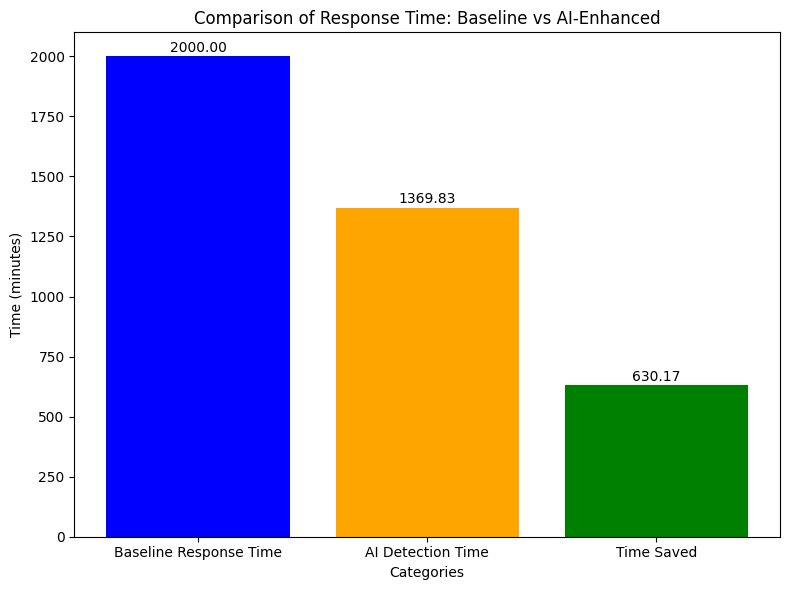

In [ ]:
import matplotlib.pyplot as plt

# Values for the graph
baseline_response_time = 2000  # Baseline response time in minutes
average_detection_time = 1369.83  # Detection time with AI in minutes
time_saved = baseline_response_time - average_detection_time

# Create the figure
plt.figure(figsize=(8, 6))

# Bar plot for time comparison
times = [baseline_response_time, average_detection_time, time_saved]
labels = ['Baseline Response Time', 'AI Detection Time', 'Time Saved']
colors = ['blue', 'orange', 'green']

plt.bar(labels, times, color=colors)
plt.title('Comparison of Response Time: Baseline vs AI-Enhanced')
plt.ylabel('Time (minutes)')
plt.xlabel('Categories')

# Annotating the bars with their values
for i, value in enumerate(times):
    plt.text(i, value + 20, f'{value:.2f}', ha='center')

plt.tight_layout()
plt.show()


<ipython-input-1-e7b4fe0b3637>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
<ipython-input-1-e7b4fe0b3637>:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.1183
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0214
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0203
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0210
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0204
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0195
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0202
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0186
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0207
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0204
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0198
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0213
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0194
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0215
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0207
Epoc

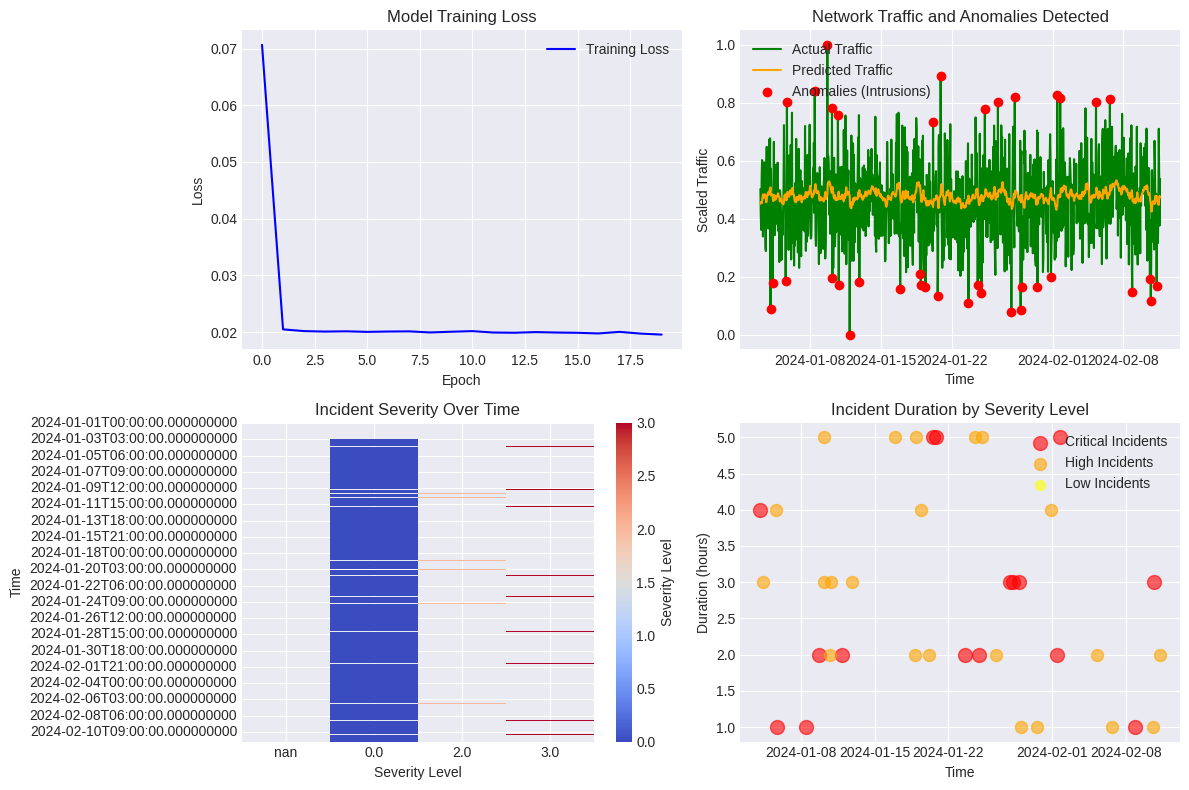

Total Anomalies Detected: 38.0
Average Detection Time (minutes): 1107.92
Average Duration of Incidents (hours): 0.11
Baseline Response Time (minutes): 2000
Time Saved by Using AI (minutes): 892.08


In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Set the style for better visualization
plt.style.use('seaborn-darkgrid')

# Step 1: Data Preparation (same as before)
# ========================================
data_length = 1000
np.random.seed(42)
timestamps = pd.date_range(start='2024-01-01', periods=data_length, freq='H')
traffic = np.random.normal(loc=50, scale=10, size=data_length)

# Create dataframe
df = pd.DataFrame({'timestamp': timestamps, 'traffic': traffic})

# Step 2: Feature Scaling
# ========================================
scaler = MinMaxScaler()
df['traffic_scaled'] = scaler.fit_transform(df[['traffic']])

# Step 3: Prepare data for LSTM
# ========================================
sequence_length = 50

def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        targets.append(data[i + sequence_length])
    return np.array(sequences), np.array(targets)

X, y = create_sequences(df['traffic_scaled'].values, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Building the LSTM Model
# ========================================
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Step 5: Detecting Incidents (Anomalies)
# ========================================
predicted_traffic = model.predict(X)
anomaly_scores = np.abs(predicted_traffic.flatten() - y)
threshold = np.mean(anomaly_scores) + 2 * np.std(anomaly_scores)

df['anomaly'] = np.nan
df.loc[sequence_length:, 'anomaly'] = (anomaly_scores > threshold).astype(int)

# Step 6: Advanced Incident Response Workflow (Updated)
# ========================================
def incident_response_flow(timestamp, severity, action_taken, duration, detection_time):
    return {
        'timestamp': timestamp,
        'severity': severity,
        'action_taken': action_taken,
        'duration': duration,
        'detection_time': detection_time
    }

response_log = []
severities = []
durations = []
actions_taken = []
detection_times = []

for index, row in df[sequence_length:].iterrows():
    if row['anomaly'] == 1:
        score = anomaly_scores[index - sequence_length]
        detection_time = row['timestamp'] - df['timestamp'][sequence_length - 1]

        if score > threshold + 0.05:
            severity = 'Critical'
            action_taken = 'Immediate shutdown or investigation.'
        elif score > threshold:
            severity = 'High'
            action_taken = 'Send alert to SOC team for analysis.'
        else:
            severity = 'Low'
            action_taken = 'Log the incident for further review.'

        duration = random.randint(1, 5)  # Simulate the duration in hours for incident resolution
        response_log.append(incident_response_flow(row['timestamp'], severity, action_taken, duration, detection_time.total_seconds() / 60))  # Convert to minutes

        severities.append(severity)
        durations.append(duration)
        actions_taken.append(action_taken)
        detection_times.append(detection_time.total_seconds() / 60)  # Store detection time in minutes
    else:
        severities.append('Normal')
        durations.append(0)
        actions_taken.append('No action')
        detection_times.append(0)

df.loc[sequence_length:, 'severity'] = severities
df.loc[sequence_length:, 'duration'] = durations
df.loc[sequence_length:, 'action_taken'] = actions_taken
df.loc[sequence_length:, 'detection_time'] = detection_times

# Step 7: Advanced Visualization (Cleaned Up)
# ========================================
plt.figure(figsize=(12, 8))

# 1. Visualizing Training Loss over Epochs
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# 2. Anomalies Over Time
plt.subplot(2, 2, 2)
plt.plot(df['timestamp'][sequence_length:], df['traffic_scaled'][sequence_length:], label='Actual Traffic', color='green')
plt.plot(df['timestamp'][sequence_length:], predicted_traffic, label='Predicted Traffic', color='orange')
plt.scatter(df['timestamp'][sequence_length:][df['anomaly'] == 1],
            df['traffic_scaled'][sequence_length:][df['anomaly'] == 1],
            color='red', label='Anomalies (Intrusions)', zorder=5)

plt.title('Network Traffic and Anomalies Detected')
plt.xlabel('Time')
plt.ylabel('Scaled Traffic')
plt.legend()

# 3. Heatmap of Severity Over Time
plt.subplot(2, 2, 3)
severity_map = {'Critical': 3, 'High': 2, 'Low': 1, 'Normal': 0}
df['severity_level'] = df['severity'].map(severity_map)
severity_pivot = df.pivot(index='timestamp', columns='severity_level', values='severity_level')
sns.heatmap(severity_pivot, cmap='coolwarm', cbar_kws={'label': 'Severity Level'}, annot=False)
plt.title('Incident Severity Over Time')
plt.xlabel('Severity Level')
plt.ylabel('Time')

# 4. Incident Duration by Severity Level
plt.subplot(2, 2, 4)
df_critical = df.loc[df['severity'] == 'Critical']
df_high = df.loc[df['severity'] == 'High']
df_low = df.loc[df['severity'] == 'Low']

plt.scatter(df_critical['timestamp'], df_critical['duration'], color='red', label='Critical Incidents', s=100, alpha=0.6)
plt.scatter(df_high['timestamp'], df_high['duration'], color='orange', label='High Incidents', s=75, alpha=0.6)
plt.scatter(df_low['timestamp'], df_low['duration'], color='yellow', label='Low Incidents', s=50, alpha=0.6)
plt.title('Incident Duration by Severity Level')
plt.xlabel('Time')
plt.ylabel('Duration (hours)')
plt.legend()

plt.tight_layout()  # Adjust subplots to fit into the figure area.
plt.show()

# Step 8: Statistics Summary
# ========================================
total_anomalies = df['anomaly'].sum()
average_detection_time = df['detection_time'].mean()
average_duration = df['duration'].mean()

# Assume a baseline response time for comparison (in minutes)
baseline_response_time = 2000

# Calculate time saved by using AI
time_saved = baseline_response_time - average_detection_time

print(f"Total Anomalies Detected: {total_anomalies}")
print(f"Average Detection Time (minutes): {average_detection_time:.2f}")
print(f"Average Duration of Incidents (hours): {average_duration:.2f}")
print(f"Baseline Response Time (minutes): {baseline_response_time}")
print(f"Time Saved by Using AI (minutes): {time_saved:.2f}")



In [ ]:
# Step 1: Add dummy features for root cause analysis
df['source_ip'] = np.random.choice(['192.168.1.1', '10.0.0.2', '172.16.0.3'], size=data_length)
df['traffic_type'] = np.random.choice(['HTTP', 'HTTPS', 'FTP', 'SSH'], size=data_length)

# Step 2: After anomaly detection, analyze features contributing to anomalies
anomalies_df = df[df['anomaly'] == 1]

# Group by the dummy features to see the distribution of anomalies
root_cause_analysis = anomalies_df.groupby(['source_ip', 'traffic_type']).size().reset_index(name='count')
print(root_cause_analysis)


      source_ip traffic_type  count
0      10.0.0.2          FTP      5
1      10.0.0.2         HTTP      2
2      10.0.0.2        HTTPS      1
3      10.0.0.2          SSH      5
4    172.16.0.3         HTTP      3
5    172.16.0.3        HTTPS      3
6    172.16.0.3          SSH      7
7   192.168.1.1          FTP      2
8   192.168.1.1         HTTP      4
9   192.168.1.1        HTTPS      2
10  192.168.1.1          SSH      4


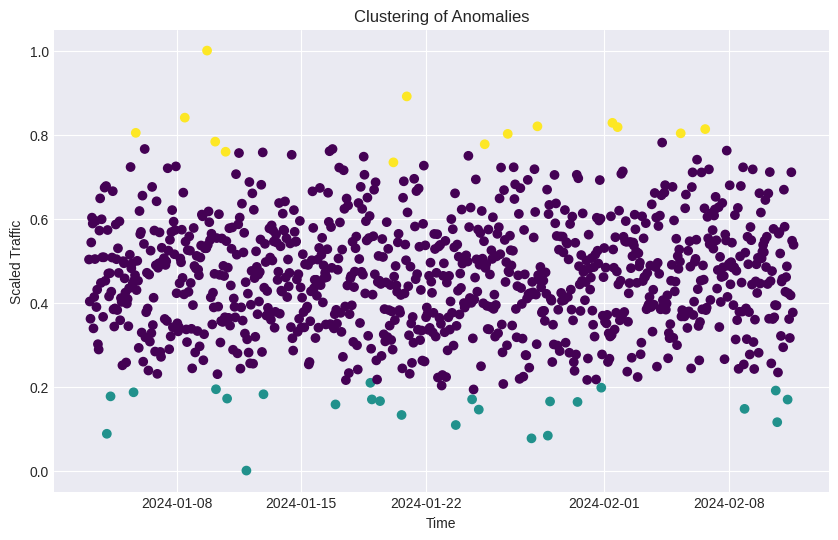

In [ ]:
from sklearn.cluster import KMeans

# Extracting relevant features for clustering (including anomaly scores and traffic data)
features = df[['traffic_scaled', 'anomaly']].dropna()

# Apply K-means clustering to categorize incidents
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = np.nan
df.loc[sequence_length:, 'cluster'] = kmeans.fit_predict(features)

# Visualize clusters on the plot
plt.figure(figsize=(10, 6))
plt.scatter(df['timestamp'][sequence_length:], df['traffic_scaled'][sequence_length:], c=df['cluster'][sequence_length:], cmap='viridis')
plt.title('Clustering of Anomalies')
plt.xlabel('Time')
plt.ylabel('Scaled Traffic')
plt.show()


In [ ]:
# Modify the LSTM model to output confidence scores
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Predict traffic and get confidence scores
predicted_traffic = model.predict(X)
confidence_scores = 1 - np.abs(predicted_traffic.flatten() - y) / np.max(np.abs(predicted_traffic.flatten() - y))

# Add confidence scores to the dataframe
df['confidence_score'] = np.nan
df.loc[sequence_length:, 'confidence_score'] = confidence_scores


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.1868
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0232
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0201
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0183
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0189
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0209
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0178
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0197
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0216
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0188
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0190
Epoch 13/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0194
Epoch 14/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0183
Epoch 15/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0194
Epoch 16/20
30/

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


<ipython-input-5-57e338c7ca7e>:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_timestamps = pd.date_range(df['timestamp'].iloc[-1] + pd.Timedelta(hours=1), periods=future_steps, freq='H')


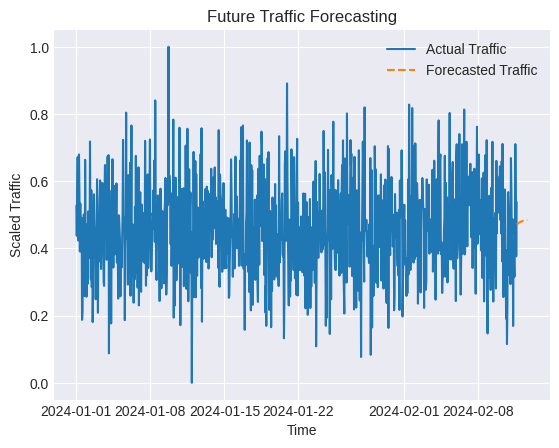

In [ ]:
# Generate future traffic predictions
future_steps = 24  # Forecast the next 24 hours
future_input = df['traffic_scaled'].values[-sequence_length:]
future_input = future_input.reshape((1, sequence_length, 1))

future_predictions = []
for _ in range(future_steps):
    predicted_value = model.predict(future_input)
    future_predictions.append(predicted_value[0][0])

    # Update future_input by appending the new prediction
    future_input = np.append(future_input[0, 1:], predicted_value).reshape((1, sequence_length, 1))

# Plot future predictions
future_timestamps = pd.date_range(df['timestamp'].iloc[-1] + pd.Timedelta(hours=1), periods=future_steps, freq='H')
plt.plot(df['timestamp'], df['traffic_scaled'], label='Actual Traffic')
plt.plot(future_timestamps, future_predictions, label='Forecasted Traffic', linestyle='dashed')
plt.title('Future Traffic Forecasting')
plt.xlabel('Time')
plt.ylabel('Scaled Traffic')
plt.legend()
plt.show()


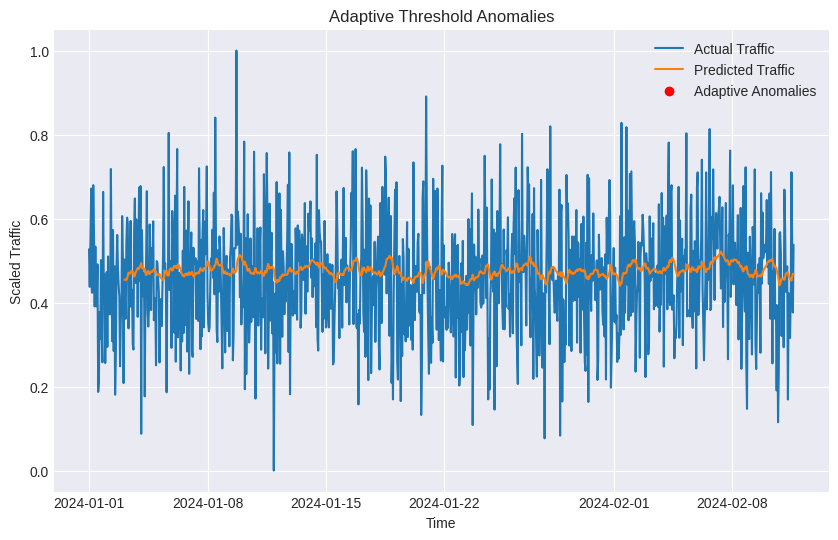

In [ ]:
# Calculate rolling mean and standard deviation for adaptive threshold
rolling_mean = df['traffic_scaled'].rolling(window=50).mean()
rolling_std = df['traffic_scaled'].rolling(window=50).std()

# Set adaptive threshold
adaptive_threshold = rolling_mean + 2 * rolling_std

# Detect anomalies based on the adaptive threshold
df['adaptive_anomaly'] = np.nan
df.loc[sequence_length:, 'adaptive_anomaly'] = (np.abs(predicted_traffic.flatten() - df['traffic_scaled'][sequence_length:]) > adaptive_threshold[sequence_length:]).astype(int)

# Visualize anomalies with adaptive threshold
plt.figure(figsize=(10, 6))
plt.plot(df['timestamp'], df['traffic_scaled'], label='Actual Traffic')
plt.plot(df['timestamp'][sequence_length:], predicted_traffic, label='Predicted Traffic')
plt.scatter(df['timestamp'][sequence_length:][df['adaptive_anomaly'] == 1], df['traffic_scaled'][sequence_length:][df['adaptive_anomaly'] == 1], color='red', label='Adaptive Anomalies')
plt.title('Adaptive Threshold Anomalies')
plt.xlabel('Time')
plt.ylabel('Scaled Traffic')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE
mae = mean_absolute_error(y, predicted_traffic)
rmse = np.sqrt(mean_squared_error(y, predicted_traffic))

print(f'MAE: {mae:.4f}, RMSE: {rmse:.4f}')

# Calculate F1-score for anomaly detection
from sklearn.metrics import f1_score

f1 = f1_score(df['anomaly'][sequence_length:], df['adaptive_anomaly'][sequence_length:])
print(f'F1-score for anomaly detection: {f1:.4f}')


MAE: 0.1114, RMSE: 0.1398
F1-score for anomaly detection: 0.0000
